<a href="https://colab.research.google.com/github/manhili/Assignment-Linear-Regression/blob/main/Copy_of_Linear_Regression_Nhili.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Imports**

In [ ]:
import sys
import sklearn
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model 
import urllib.request
from sklearn import preprocessing
from sklearn import pipeline 
from sklearn.linear_model import LinearRegression
from scipy.stats import lognorm

**Download data**

In [ ]:
def cVirale(day):
    s = 0.5
    mean, var, skew, kurt = lognorm.stats(s, moments='mvsk')
    x = np.linspace(lognorm.ppf(0, s),lognorm.ppf(0.99, s), 100)
    days = np.linspace(-5, 15, len(x))

    lr = LinearRegression()
    lr.fit(days.reshape(-1, 1), x)
    return(float(lognorm.pdf(lr.predict([[day]]), s)/max(lognorm.pdf(x, s))))

c = []
for day in np.arange(-5, 20):
    c.append(cVirale(day))

print(c)

[0.0, 0.006677901547061112, 0.20554832549664084, 0.6260173091451563, 0.9258817062987911, 0.9985862736692374, 0.9162189346640229, 0.7679591151685397, 0.610329964595226, 0.4697292197249814, 0.3545709672216219, 0.2646046793977712, 0.19623651064484002, 0.1451258561791916, 0.1072760405678079, 0.07938597387327306, 0.05887643571110518, 0.04379456311642677, 0.03268883837071063, 0.02449203116429482, 0.018424189041023917, 0.013916949826873196, 0.01055644859237273, 0.00804109995832768, 0.006150748821714521]


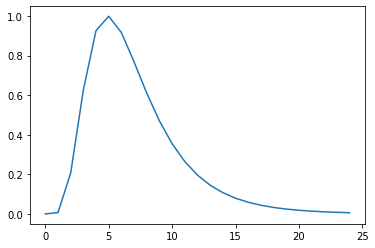

In [ ]:
plt.plot(c)

#save_fig('best_fit_model_plot')
plt.show()

In [ ]:
def getNewInfected(infected):
    totalInfected=[0]+infected
    output=[]
    for i in range(len(totalInfected)-1):
        output+=[totalInfected[i+1]-totalInfected[i]]
    return(output)

In [ ]:
infected = getNewInfected([1, 3, 5, 6, 10])

In [ ]:
print(infected)

[1, 2, 2, 1, 4]


In [ ]:
idCovidP0=list(np.random.choice(range(100),np.sum(np.array(infected)),replace=False))

In [ ]:
print(idCovidP0)

[58, 61, 7, 11, 14, 74, 50, 10, 40, 19]


In [ ]:
import urllib.request
data_path = os.path.join("datasets", "")
download_path = "https://raw.githubusercontent.com/AbdelMahm/FSR/master/IDDLO-29-20/Notebooks/datasets/"
os.makedirs(data_path, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = download_path + filename
    urllib.request.urlretrieve(url, data_path + filename)

In [ ]:
oecd_bli = pd.read_csv(data_path + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(data_path + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

In [ ]:
#take a look to the first file
oecd_bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


**Preprocessing**

In [ ]:
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli.head()

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,Housing expenditure,Job security,Life expectancy,Life satisfaction,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,20.0,4.8,82.1,7.3,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,21.0,3.9,81.0,6.9,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,21.0,5.0,80.5,6.9,3.88,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,21.0,4.6,73.7,7.0,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,21.0,6.4,81.5,7.3,0.90,46911.0,92.0,2.5,89.0,522.0,14.25,61.0,91.0,17.2


In [ ]:
#take a look to the first file
gdp_per_capita.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [ ]:
# Preprocessing of the data  (iterested with column "2015" which is the "GDP per capita")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
gdp_per_capita.head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [ ]:
#merge data  
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                              left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)

data = full_country_stats[["GDP per capita", 'Life satisfaction']]

**Linear Regression Model**

In [ ]:
data.head()

,GDP per capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9


Select some features

In [ ]:
#select the features you are interested in
X = np.c_[data["GDP per capita"]]
y = np.c_[data["Life satisfaction"]]
np.shape(X)

(36, 1)

Visualization

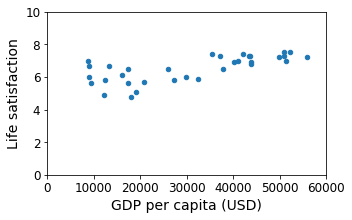

In [ ]:
# Visualize the sample data
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])

plt.xlabel("GDP per capita (USD)")

plt.show()
#

Training

In [ ]:
lrModel = sklearn.linear_model.LinearRegression()

# Train the model
lrModel.fit(X, y)

#model parameters
w0, w1 = lrModel.intercept_[0], lrModel.coef_[0][0]

#R2 (when R2=1, all data is fit -> the Loss(w)=0)
print(lrModel.score(X, y))

0.40410998750014093


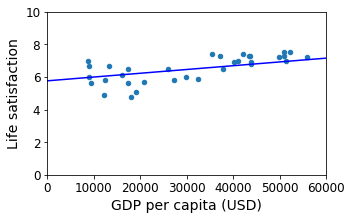

In [ ]:
#plot
data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.xlabel("GDP per capita (USD)")
plt.axis([0, 60000, 0, 10])
x=np.linspace(0, 60000, 1000)
plt.plot(x, w0 + w1*x, "b")

#save_fig('best_fit_model_plot')
plt.show()

Prediction

In [ ]:
# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(lrModel.predict(X_new)) # outputs [[ 5.96242338]]

[[6.28653637]]


**Add polynomial features**

In [ ]:
poly = preprocessing.PolynomialFeatures(degree=5, include_bias=False)
scaler = preprocessing.StandardScaler()

pipelineLRModel = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lrModel)])
np.shape(X)
np.shape(y)
pipelineLRModel.fit(X, y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=5, include_bias=False,
                                    interaction_only=False, order='C')),
                ('scal',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

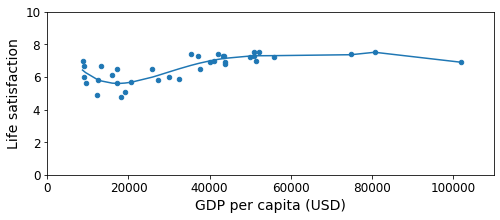

In [ ]:
data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,3))
plt.axis([0, 110000, 0, 10])

curve = pipelineLRModel.predict(X)
plt.plot(X, curve)
plt.xlabel("GDP per capita (USD)")
plt.show()

In [ ]:
#R2
print(pipelineLRModel.score(X, y))

0.6806653014078106



**Regularization (Ridge)**

In [ ]:
lrModelRidge = sklearn.linear_model.Ridge(alpha=10**9.5) # alpha == lambda notation in the course
Xsample = np.c_[data["GDP per capita"]]
ysample = np.c_[data["Life satisfaction"]]
lrModelRidge.fit(Xsample, ysample)
w0ridge, w1ridge = lrModelRidge.intercept_[0], lrModelRidge.coef_[0][0]

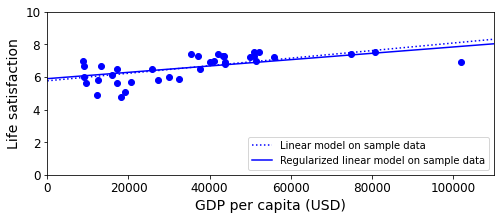

In [ ]:
f = plt.figure(figsize=(8,3))

plt.xlabel("GDP per capita")
plt.ylabel('Life satisfaction')

plt.plot(list(data["GDP per capita"]), list(data["Life satisfaction"]), "bo")

x = np.linspace(0, 110000, 1000)
plt.plot(x, w0 + w1*x, "b:", label="Linear model on sample data")
plt.plot(x, w0ridge + w1ridge * x, "b", label="Regularized linear model on sample data")

plt.legend(loc="lower right")
plt.axis([0, 110000, 0, 10])
plt.xlabel("GDP per capita (USD)")

plt.show()

In [ ]:
#R2
print(lrModelRidge.score(X, y))

0.39354133243998385


**Exercice**

**1- Try LASSO regularization**

In [ ]:
from sklearn.linear_model import Lasso
lrModelLASSO = sklearn.linear_model.Lasso(alpha=10**9.5) # alpha == lambda notation in the course
Xsample = np.c_[data["GDP per capita"]]
ysample = np.c_[data["Life satisfaction"]]
lrModelLASSO.fit(Xsample, ysample)
w0LASSO = lrModelLASSO.intercept_[0] 
w1LASSO = lrModelLASSO.coef_[0]

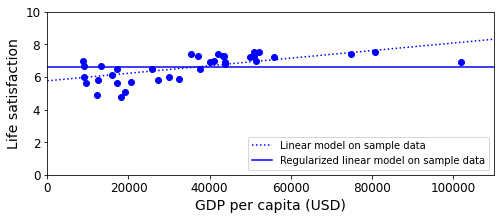

In [ ]:
f = plt.figure(figsize=(8,3))

plt.xlabel("GDP per capita")
plt.ylabel('Life satisfaction')

plt.plot(list(data["GDP per capita"]), list(data["Life satisfaction"]), "bo")

x = np.linspace(0, 110000, 1000)
plt.plot(x, w0 + w1*x, "b:", label="Linear model on sample data")
plt.plot(x, w0LASSO + w1LASSO*x, "b", label="Regularized linear model on sample data")

plt.legend(loc="lower right")
plt.axis([0, 110000, 0, 10])
plt.xlabel("GDP per capita (USD)")

plt.show()

In [ ]:
#R2
print(lrModelLASSO.score(X, y))

0.0


**4- Tune the regularization hyper-parameter alpha (lambda in the course)**

In [ ]:
from scipy.stats import uniform as sp_rand
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# prepare a uniform distribution to sample for the alpha parameter
param_grid = {'alpha': sp_rand()}
# create and fit a ridge regression model, testing random alpha values
rsearch = RandomizedSearchCV(estimator=lrModelRidge, param_distributions=param_grid, n_iter=100)
rsearch.fit(Xsample, ysample)
print(rsearch)
# summarize the results of the random parameter search
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=Ridge(alpha=3162277660.1683793, copy_X=True,
                                   fit_intercept=True, max_iter=None,
                                   normalize=False, random_state=None,
                                   solver='auto', tol=0.001),
                   iid='deprecated', n_iter=100, n_jobs=None,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f60a7945290>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)
-4.966860340413988
0.9871810975614932


In [ ]:
lrModelRidge2 = sklearn.linear_model.Ridge(alpha=0.99) # alpha == lambda notation in the course
Xsample = np.c_[data["GDP per capita"]]
ysample = np.c_[data["Life satisfaction"]]
lrModelRidge2.fit(Xsample, ysample)
w0ridge2, w1ridge2 = lrModelRidge2.intercept_[0], lrModelRidge2.coef_[0]

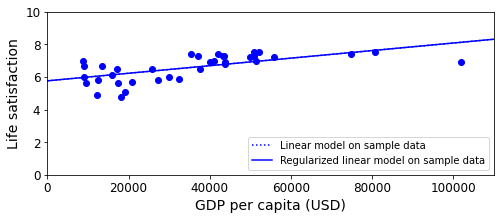

In [ ]:
f = plt.figure(figsize=(8,3))

plt.xlabel("GDP per capita")
plt.ylabel('Life satisfaction')

plt.plot(list(data["GDP per capita"]), list(data["Life satisfaction"]), "bo")

x = np.linspace(0, 110000, 1000)
plt.plot(x, w0 + w1*x, "b:", label="Linear model on sample data")
plt.plot(x, w0ridge2 + w1ridge2 * x, "b", label="Regularized linear model on sample data")

plt.legend(loc="lower right")
plt.axis([0, 110000, 0, 10])
plt.xlabel("GDP per capita (USD)")

plt.show()

In [ ]:
#R2
print(lrModelRidge2.score(X, y))

0.40410998750014093


**2- Try on different data**

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/manhili/Assignment-Linear-Regression/main/datasets/HousingData.csv"
data2 = pd.read_csv(url, na_values="NaN")
print(data2.shape)

(506, 14)


In [ ]:
#take a look to the file
data2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
#drop missing values
data2 = data2.dropna()


In [ ]:
data2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


**Select some features**

In [ ]:
#select the features you are interested in
X = np.c_[data2["RM"]]
y = np.c_[data2["MEDV"]]

In [ ]:
data2.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


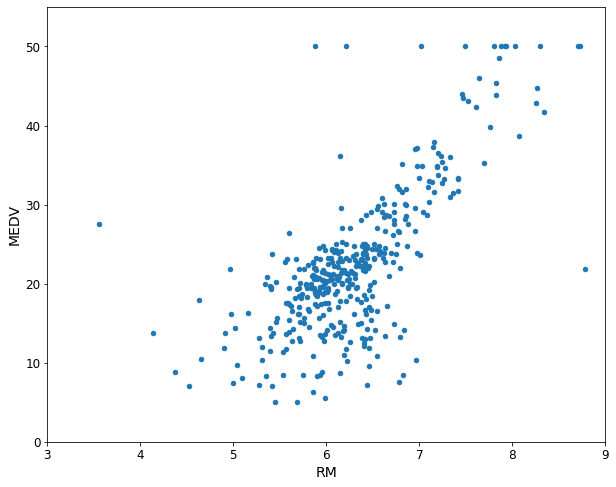

In [ ]:
# Visualize the sample data
data2.plot(kind='scatter', x="RM", y='MEDV', figsize=(10,8))
plt.axis([3, 9, 0, 55])
plt.show()

**Training**

In [ ]:
reglin = sklearn.linear_model.LinearRegression()

# Train the model
reglin.fit(X, y)

#model parameters
w0, w1 = reglin.intercept_, reglin.coef_

#R2 (when R2=1, all data is fit -> the Loss(w)=0)
print(reglin.score(X, y))

0.5241047099146254


ValueError: ignored

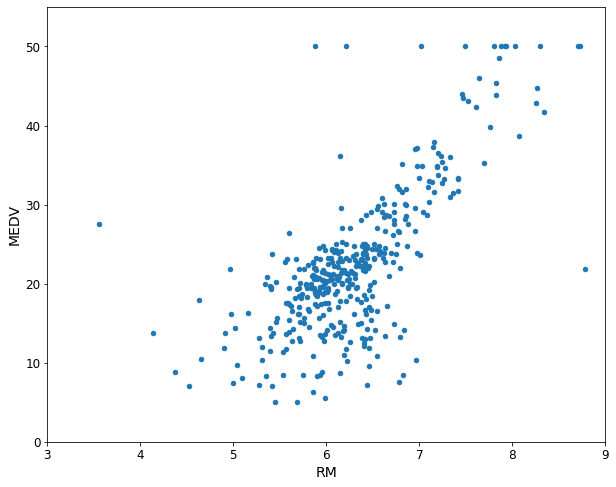

In [ ]:
#plot
data2.plot(kind='scatter', x="RM", y='MEDV', figsize=(10,8))
plt.axis([3, 9, 0, 55])
x=np.linspace(3, 9, 200)
plt.plot(x, w0 + w1*x, "b")

#save_fig('best_fit_model_plot')
plt.show()

**prediction**

In [ ]:
# Make a prediction for bs
X_new = [[10]]  
print(reglin.predict(X_new)) # outputs [[10.36071063]]

[[57.63666577]]


**Add polynomial features**


In [ ]:
poly = preprocessing.PolynomialFeatures(degree=5, include_bias=False)
scaler = preprocessing.StandardScaler()

pipelineLRModel = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', reglin)])
np.shape(X)
np.shape(y)
pipelineLRModel.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=5, include_bias=False)),
                ('scal', StandardScaler()), ('lin', LinearRegression())])

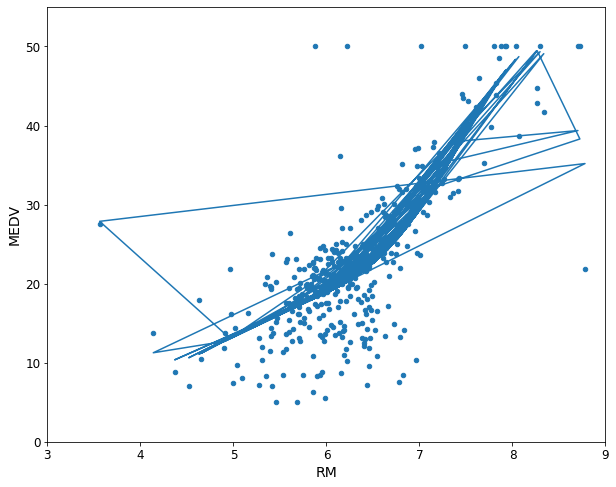

In [ ]:
data2.plot(kind='scatter', x="RM", y='MEDV', figsize=(10,8))
plt.axis([3, 9, 0, 55])

curve = pipelineLRModel.predict(X)
plt.plot(X, curve)
plt.show()

In [ ]:
#R2
print(pipelineLRModel.score(X, y))

0.6282718839065651


**Regularization (Ridge)**

In [ ]:
regridge = sklearn.linear_model.Ridge(alpha=0.98) # alpha == lambda notation in the course
Xsample = np.c_[data2["RM"]]
ysample = np.c_[data2["MEDV"]]
regridge.fit(Xsample, ysample)
w0rg, w1rg = regridge.intercept_[0], regridge.coef_[0]

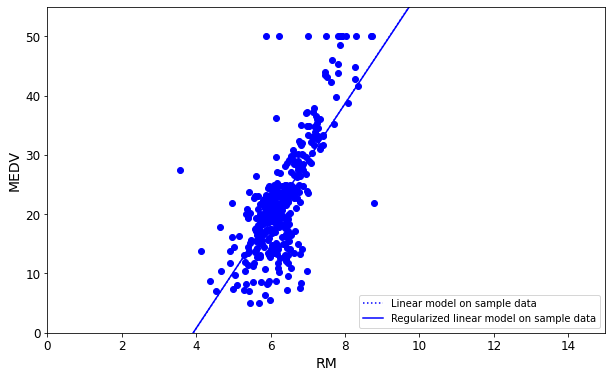

In [ ]:
f = plt.figure(figsize=(10,6))

plt.xlabel("RM")
plt.ylabel('MEDV')

plt.plot(list(data2["RM"]), list(data2["MEDV"]), "bo")

x = np.linspace(0, 15, 100)
plt.plot(x, w0 + w1*x, "b:", label="Linear model on sample data")
plt.plot(x, w0rg + w1rg * x, "b", label="Regularized linear model on sample data")

plt.legend(loc="lower right")
plt.axis([0, 15, 0, 55])

plt.show()

In [ ]:
#R2
print(regridge.score(X, y))

0.5241023168270235


In [ ]:
reglasso = sklearn.linear_model.Lasso(alpha=0.96) # alpha == lambda notation in the course
Xsample = np.c_[data2["RM"]]
ysample = np.c_[data2["MEDV"]]
reglasso.fit(Xsample, ysample)
w0ls, w1ls = reglasso.intercept_, reglasso.coef_


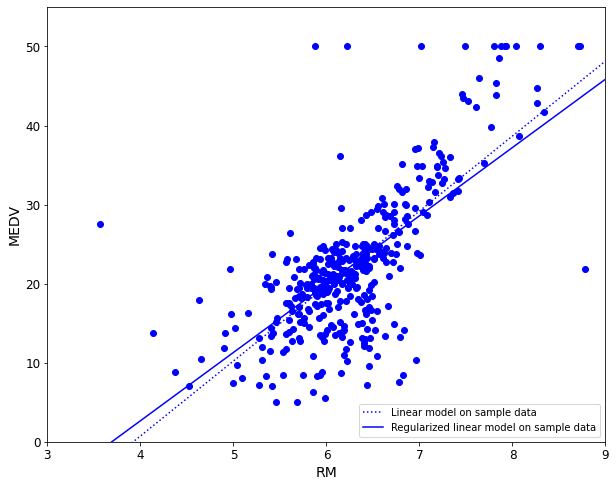

In [ ]:
f = plt.figure(figsize=(10,8))

plt.xlabel("RM")
plt.ylabel('MEDV')

plt.plot(list(data2["RM"]), list(data2["MEDV"]), "bo")

x = np.linspace(0, 15, 100)
plt.plot(x, w0 + w1*x, "b:", label="Linear model on sample data")
plt.plot(x, w0ls + w1ls*x, "b", label="Regularized linear model on sample data")

plt.legend(loc="lower right")
plt.axis([3, 9, 0, 55])

plt.show()

In [ ]:
#R2
print(reglasso.score(X, y))

0.5199560525425587


**3- Try with more features (All features)**

In [ ]:
target_column = data2['MEDV'] 
predictors = X=pd.DataFrame(np.c_[data2['LSTAT'],data2['RM'],data2['TAX'],data2['PTRATIO']], columns = ['LSTAT','RM','TAX','PTRATIO'])

In [ ]:
print(target_column)
print(predictors)

0      24.0
1      21.6
2      34.7
3      33.4
5      28.7
       ... 
499    17.5
500    16.8
502    20.6
503    23.9
504    22.0
Name: MEDV, Length: 394, dtype: float64
     LSTAT     RM    TAX  PTRATIO
0     4.98  6.575  296.0     15.3
1     9.14  6.421  242.0     17.8
2     4.03  7.185  242.0     17.8
3     2.94  6.998  222.0     18.7
4     5.21  6.430  222.0     18.7
..     ...    ...    ...      ...
389  15.10  5.569  391.0     19.2
390  14.33  6.027  391.0     19.2
391   9.08  6.120  273.0     21.0
392   5.64  6.976  273.0     21.0
393   6.48  6.794  273.0     21.0

[394 rows x 4 columns]


In [ ]:
lrModel3 = sklearn.linear_model.LinearRegression()

# Train the model
lrModel3.fit(X, y)

#model parameters
w0 = lrModel3.intercept_
w1 = lrModel3.coef_

print("intercept is:", w0)
print("slope is: ", w1)
#R2 (when R2=1, all data is fit -> the Loss(w)=0)
print(lrModel3.score(X, y))

intercept is: [15.73536346]
slope is:  [[-4.68138393e-01  4.94260664e+00 -4.25462214e-03 -9.01328811e-01]]
0.7073658392932178


In [ ]:
poly = preprocessing.PolynomialFeatures(degree=5, include_bias=False)
scaler = preprocessing.StandardScaler()

pipelineLRModel3 = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lrModel3)])
np.shape(X)
np.shape(y)
pipelineLRModel3.fit(X, y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=5, include_bias=False,
                                    interaction_only=False, order='C')),
                ('scal',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [ ]:
#R2
print(pipelineLRModel3.score(X, y))

0.9176247302353289


In [ ]:
lrModelRidge3 = sklearn.linear_model.Ridge(alpha=0.96) # alpha == lambda notation in the course
Xsample = predictors
ysample = target_column
lrModelRidge3.fit(Xsample, ysample)
w0ridge3, w1ridge3 = lrModelRidge3.intercept_, lrModelRidge3.coef_

In [ ]:
#R2
print(lrModelRidge3.score(X, y))

0.7073595289357855


In [ ]:
from scipy.stats import uniform as sp_rand
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# prepare a uniform distribution to sample for the alpha parameter
param_grid = {'alpha': sp_rand()}
# create and fit a ridge regression model, testing random alpha values
rsearch = RandomizedSearchCV(estimator=lrModelRidge3, param_distributions=param_grid, n_iter=100)
rsearch.fit(Xsample, ysample)
print(rsearch)
# summarize the results of the random parameter search
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=Ridge(alpha=0.98, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001),
                   iid='deprecated', n_iter=100, n_jobs=None,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f609bbaa310>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)
0.3761596654754219
0.9657100648423059
